# `ggplot2`之主题设置
`ggplot2`中的`theme elements` 语法

In [ ]:
theme(element_name = element_function())

这里`element_function()`有四个

- `element_text()`, 文本，一般用于控制标签和标题的字体风格
- `element_line()`, 线条，一般用于控制线条或线段的颜色或线条类型
- `element_rect()`, 矩形区域，一般用于控制背景矩形的颜色或者边界线条类型
- `element_blank()`, 空白，就是不分配相应的绘图空间，即删去这个地方的绘图元素。

In [3]:
library(tidyverse)

In [4]:
glimpse(mpg)

Rows: 234
Columns: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi", "…
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro", "…
$ displ        <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2.…
$ year         <int> 1999, 1999, 2008, 2008, 1999, 1999, 2008, 1999, 1999, 200…
$ cyl          <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, …
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "auto…
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4", "4…
$ cty          <int> 18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, 1…
$ hwy          <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, 2…
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p…
$ class        <chr> "compact", "compact", "compact", "compact", "compact", "c…


In [6]:
df <- mpg %>% 
  as_tibble() %>% 
  filter(class != "2seater", manufacturer %in% c("toyota", "volkswagen"))
df %>% head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv


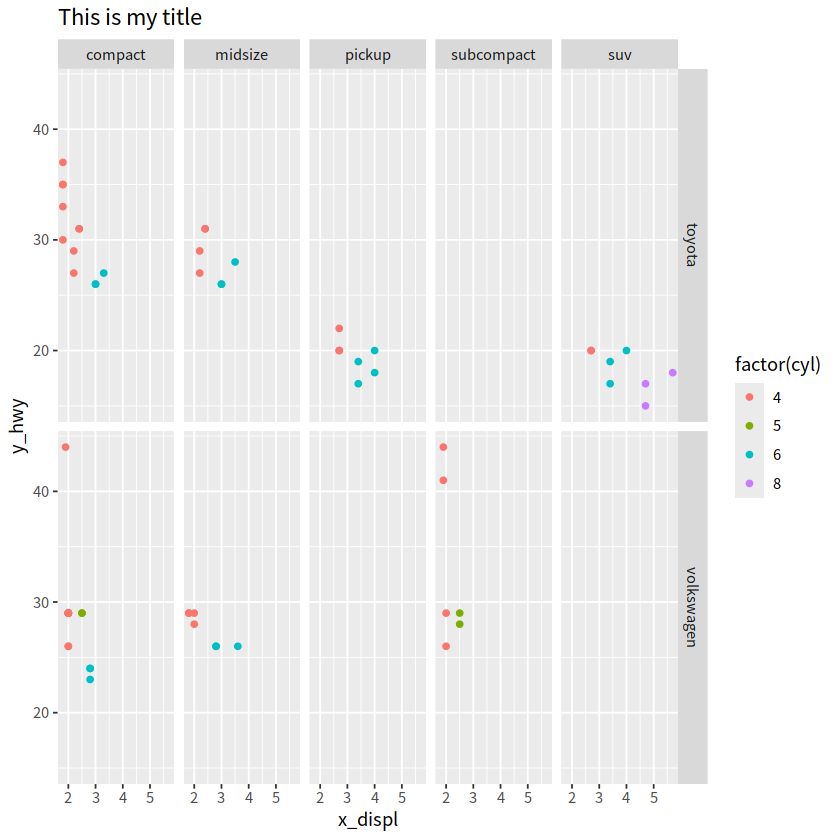

In [7]:
df %>% 
  ggplot(aes(x = displ, y = hwy, color = factor(cyl)))+
  geom_point()+
  facet_grid(vars(manufacturer), vars(class))+
  ggtitle("This is my title")+
  labs(x = "x_displ", y = "y_hwy")

## 1 图表整体元素
图表整体元素包括:
描述	|主题元素	|类型
---- | ---- | ----
整个图形背景	|plot.background	|element_rect()
图形标题|	plot.title	|element_text()
图形边距|	plot.margin|margin()

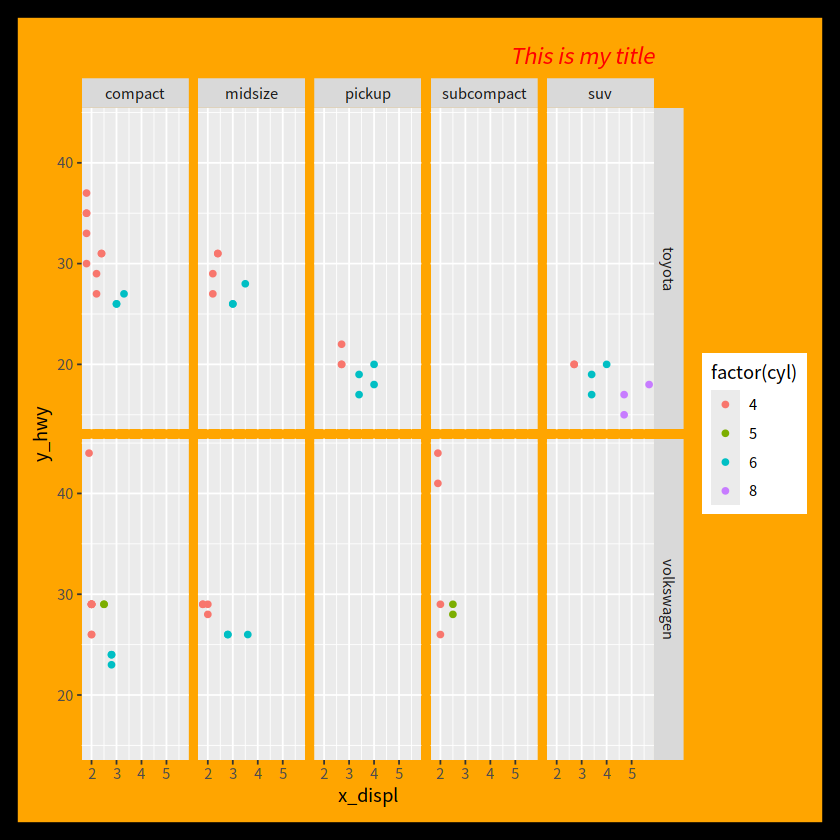

In [10]:
df %>% 
  ggplot(aes(x = displ, y = hwy, color = factor(cyl)))+
  geom_point()+
  facet_grid(vars(manufacturer), vars(class))+
  ggtitle("This is my title")+
  labs(x = "x_displ", y = "y_hwy")+
  theme(plot.background = element_rect(fill = "orange", color = "black", size = 10),
        plot.title = element_text(hjust = 1, color = "red", face = "italic"),
        plot.margin = margin(t = 29, r = 20, b = 20, l = 20, unit = "pt"))

## 2 坐标轴元素
坐标轴元素包括:
描述|主题元素|类型
----|----|----
坐标轴刻度	|axis.ticks	|element_line()
坐标轴标题	|axis.title	|element_text()
坐标轴标签	|axis.text	|element_text()
直线和坐标轴	|axis.line	|element_line()

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


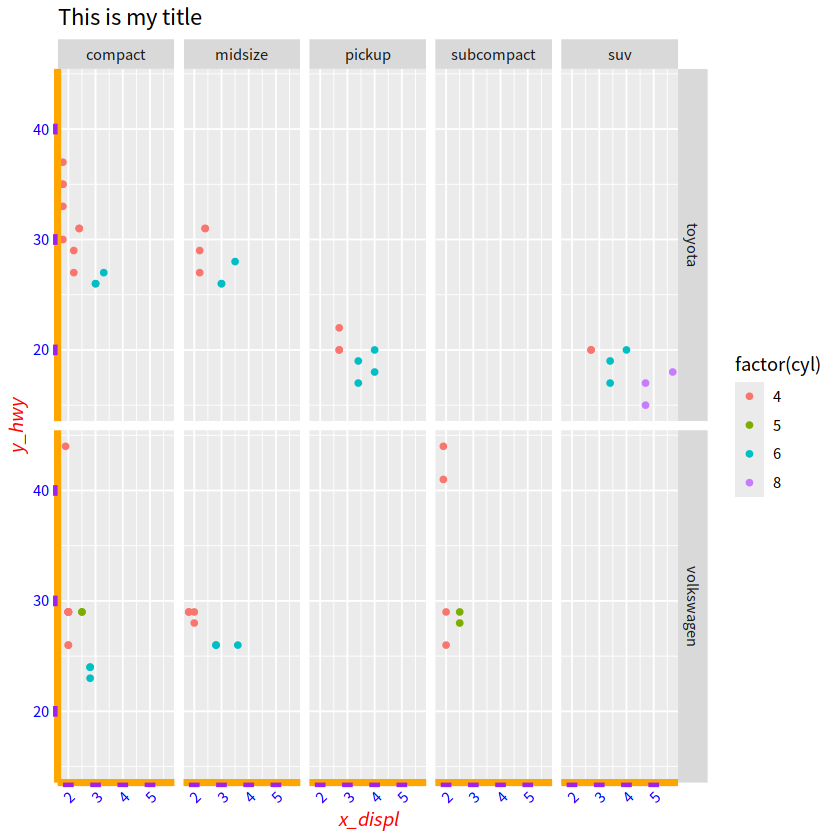

In [11]:
df %>% 
  ggplot(aes(x = displ, y = hwy, color = factor(cyl)))+
  geom_point()+
  facet_grid(vars(manufacturer), vars(class))+
  ggtitle("This is my title")+
  labs(x = "x_displ", y = "y_hwy")+
  theme(axis.line = element_line(color = "orange", size = 2),
        axis.title = element_text(color = "red", face = "italic"),
        axis.ticks = element_line(color = "purple", size = 3),
        axis.text = element_text(color = "blue"),
        axis.text.x = element_text(angle = 45, hjust = 1))

## 3  面板元素
**注意！！！这与背景是有区别的**

面板元素包括:
描述	|主题元素	|类型
----|----|----
面板背景	|panel.background|	element_rect()
面板网格线|	panel.grid	|element_line()
面板边界	|panel.border	|element_rect()

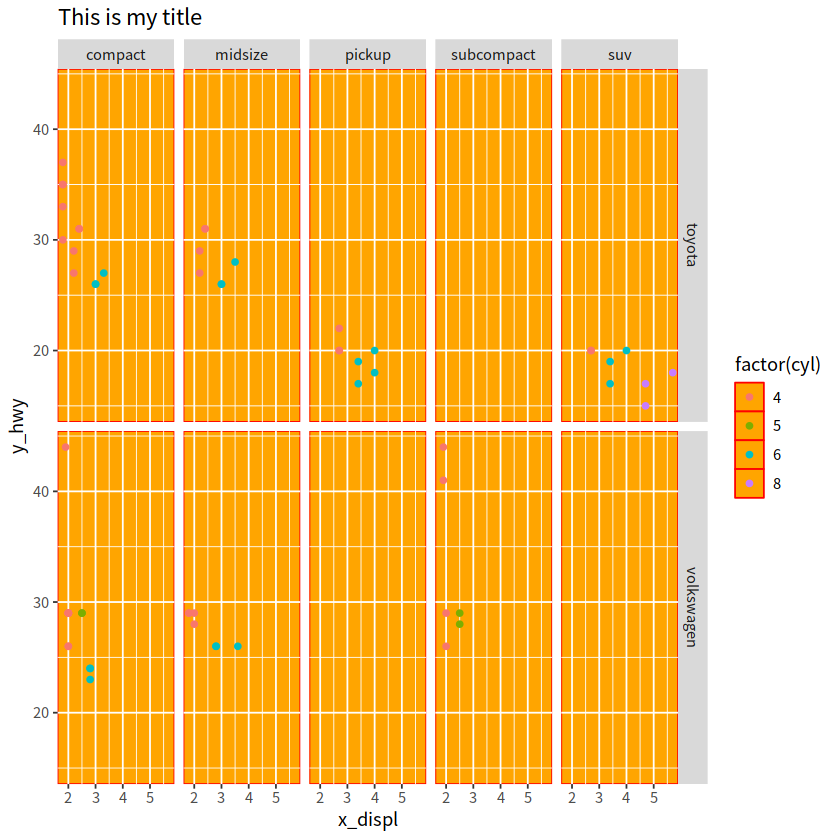

In [22]:
df %>%
  ggplot(aes(x = displ, y = hwy, color = factor(cyl))) +
  geom_point() +
  facet_grid(vars(manufacturer), vars(class)) +
  ggtitle("This is my title") +
  labs(x = "x_displ", y = "y_hwy") +
  theme(panel.background = element_rect(fill = "orange", color = "red"),
        panel.grid = element_line(color = "white", size = 0.5))

或者

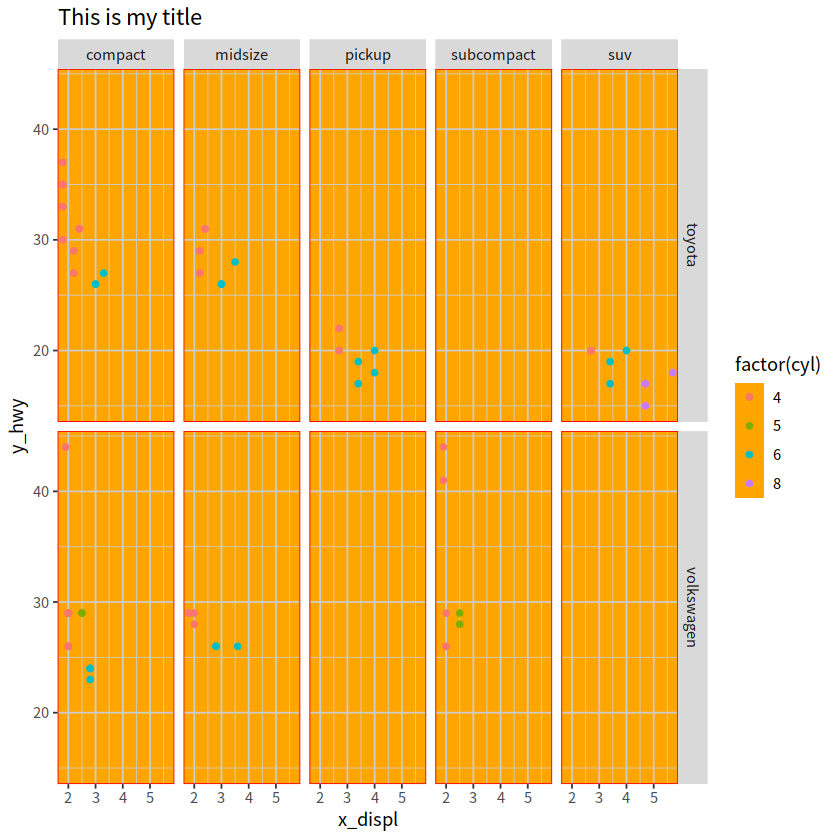

In [26]:
df %>%
  ggplot(aes(x = displ, y = hwy, color = factor(cyl))) +
  geom_point() +
  facet_grid(vars(manufacturer), vars(class)) +
  ggtitle("This is my title") +
  labs(x = "x_displ", y = "y_hwy") +
  theme(
    panel.background = element_rect(fill = "orange"),
    panel.grid = element_line(color = "grey80", size = 0.5),
    panel.border = element_rect(color = "red", fill = NA)
  )

## 4 图例元素
图例元素包括:

描述	|主题元素	|类型
----|----|----
图例背景	|legend.background	|element_rect()
图例符号	|legend.key	|element_rect()
图例标签	|legend.text	|element_text()
图例标题	|legend.title	|element_text()
图例边距	|legend.margin	|margin
图例位置	|legend.postion	|“top”, “bottom”, “left”, “right”

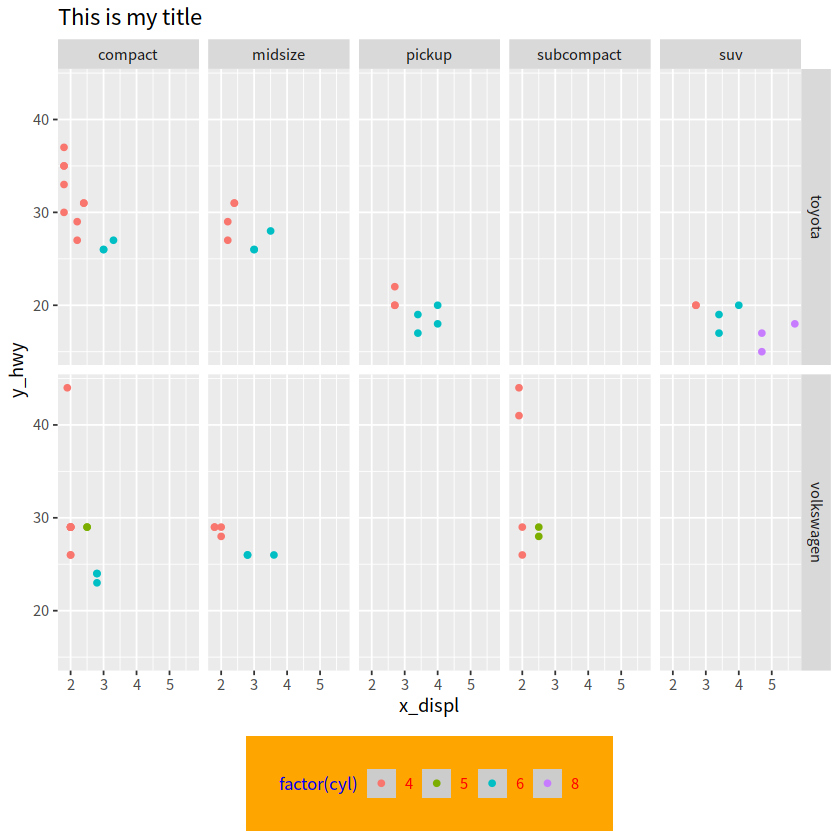

In [27]:
df %>%
  ggplot(aes(x = displ, y = hwy, color = factor(cyl))) +
  geom_point() +
  facet_grid(vars(manufacturer), vars(class)) +
  ggtitle("This is my title") +
  labs(x = "x_displ", y = "y_hwy") +
  theme(legend.background = element_rect(fill = "orange"),
        legend.title = element_text(color = "blue", size = 10),
        legend.key = element_rect(fill = "grey80"),
        legend.text = element_text(color = "red"),
        legend.margin = margin(t = 20, r = 20, b = 20, l = 20, unit = "pt"),
        legend.position = "bottom")

## 5 分面元素
分面元素包括:

描述|	主题元素|	类型
---|---|---
分面标签背景|	strip.background	|element_rect()
条状文本	|strip.text	|element_text()
分面间隔	|panel.spacing	|unit

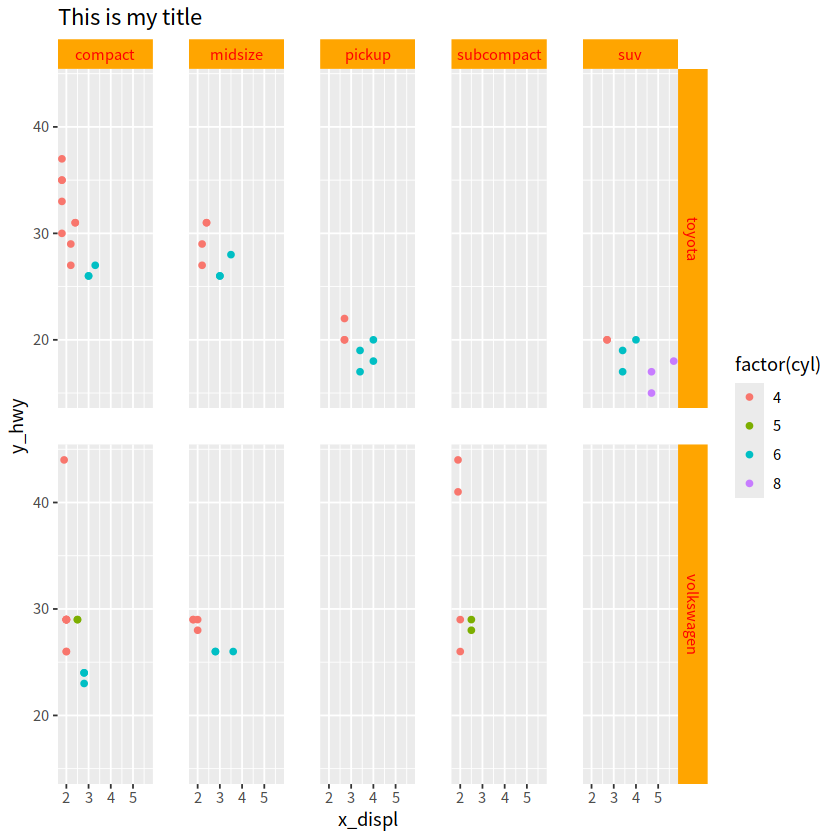

In [28]:
df %>%
  ggplot(aes(x = displ, y = hwy, color = factor(cyl))) +
  geom_point() +
  facet_grid(vars(manufacturer), vars(class)) +
  ggtitle("This is my title") +
  labs(x = "x_displ", y = "y_hwy") +
  theme(strip.background = element_rect(fill = "orange"),
        strip.text = element_text(color = "red"),
        panel.spacing = unit(0.3, "inch"))

## 6 案例

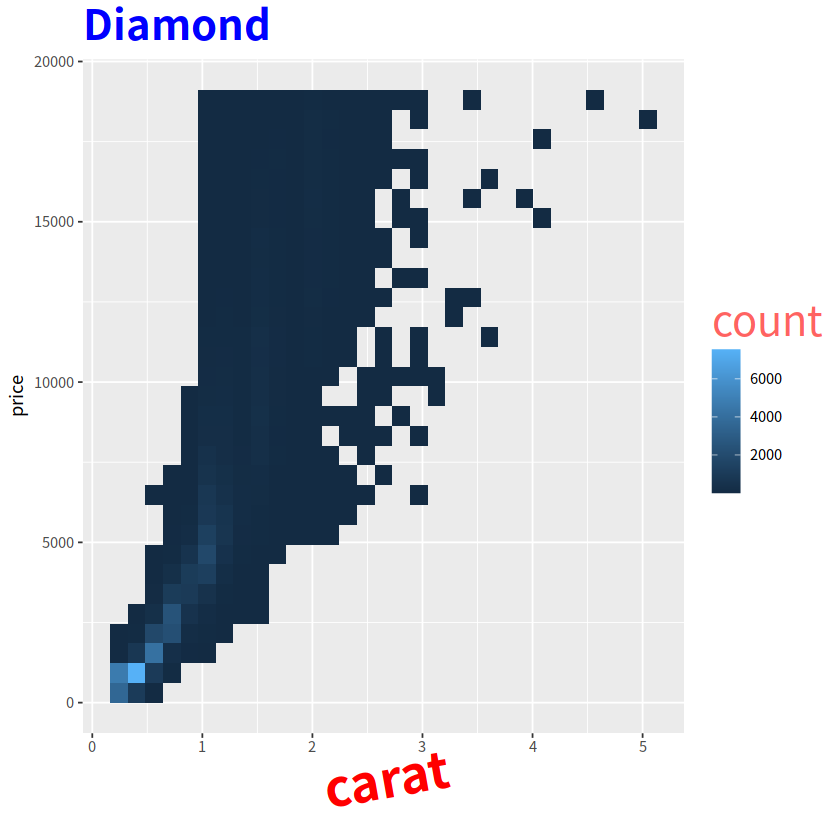

In [32]:
diamonds %>% 
  ggplot(aes(carat, price))+
  geom_bin_2d()+
  labs(title = "Diamond")+
  theme(axis.title.x = element_text(size = 30, color = "red",
                                    face = "bold", angle = 10),
        legend.title = element_text(size = 25, color = "#ff6361",
                                    margin = margin(b = 5)),
        plot.title = element_text(size = 25, face = "bold", color = "blue"))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


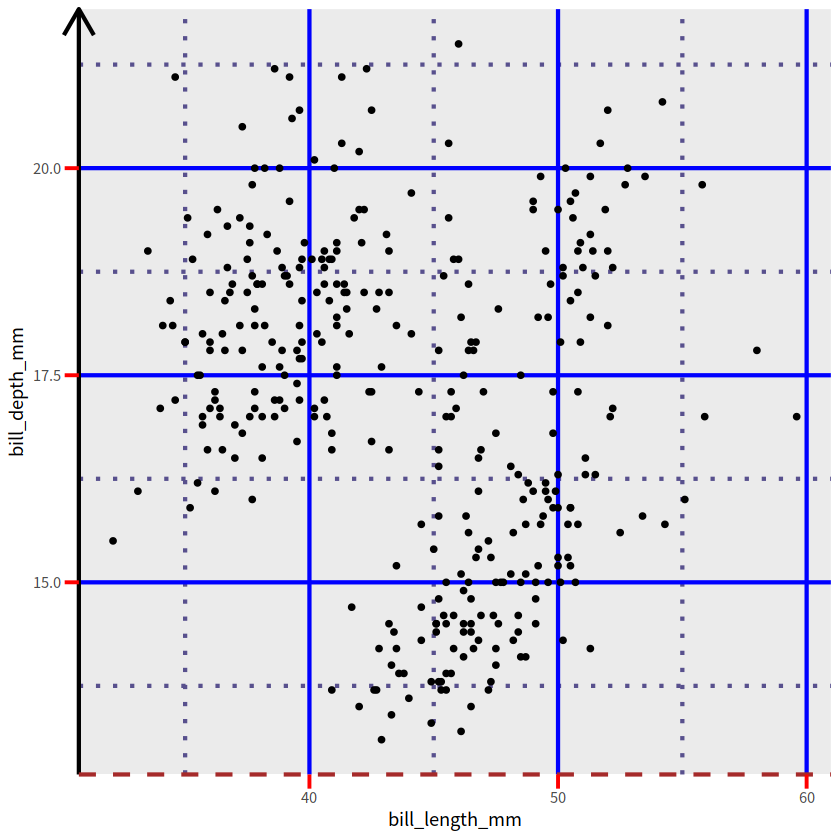

In [36]:
library(palmerpenguins)
penguins %>% 
  ggplot(aes(bill_length_mm, bill_depth_mm))+
  geom_point()+
  theme(axis.line.y = element_line(color = "black", size = 1.2, 
                                   arrow = grid::arrow()),
        axis.line.x = element_line(color = "brown", size = 1.2,
                                   linetype = "dashed"),
        axis.ticks = element_line(color = "red", size = 1.1),
        axis.ticks.length = unit(3, "mm"),
        panel.grid.minor = element_line(color = "#58508d", size = 1.2,
                                        linetype = "dotted"), 
        panel.grid.major = element_line(color = "blue", size = 1.2))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


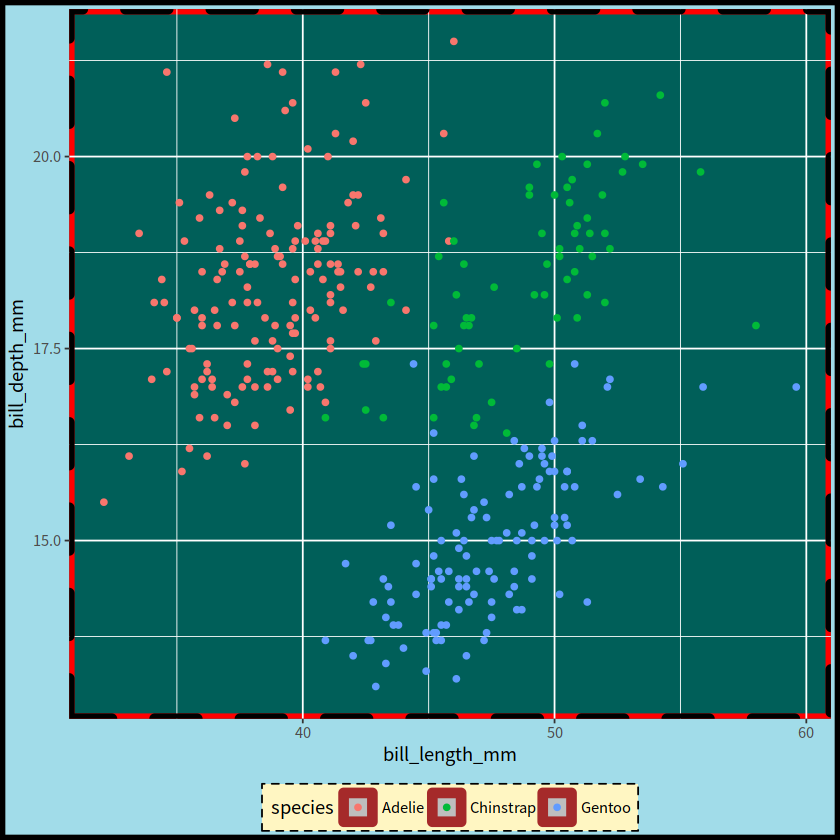

In [37]:
penguins %>% 
  ggplot(aes(bill_length_mm, bill_depth_mm)) +
  geom_point(aes(color = species)) +
  theme(legend.background = element_rect(fill = "#fff6c2", color = "black",
                                         linetype = "dashed"),
        legend.key = element_rect(fill = "grey", color = "brown"),
        panel.background = element_rect(fill = "#005F59", color = "red",
                                        size = 3),
        panel.border = element_rect(color = "black", fill = "transparent",
                                    linetype = "dashed", size = 3),
        plot.background = element_rect(fill = "#a1dce9", color = "black",
                                       size = 3),
        legend.position = "bottom")

## 7 小结
![image.png](image/ggplot2-themes.jpg)

## 8 主题风格
当然可以使用自带的主题风格

`ggplot`有很多自带的`theme`，其拓展包`ggthemes`增加了更多的`theme`

In [ ]:
thms <- list.files(path = "imags/img", pattern = "built-in", full.names = T)
knitr::include_graphics(thms)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


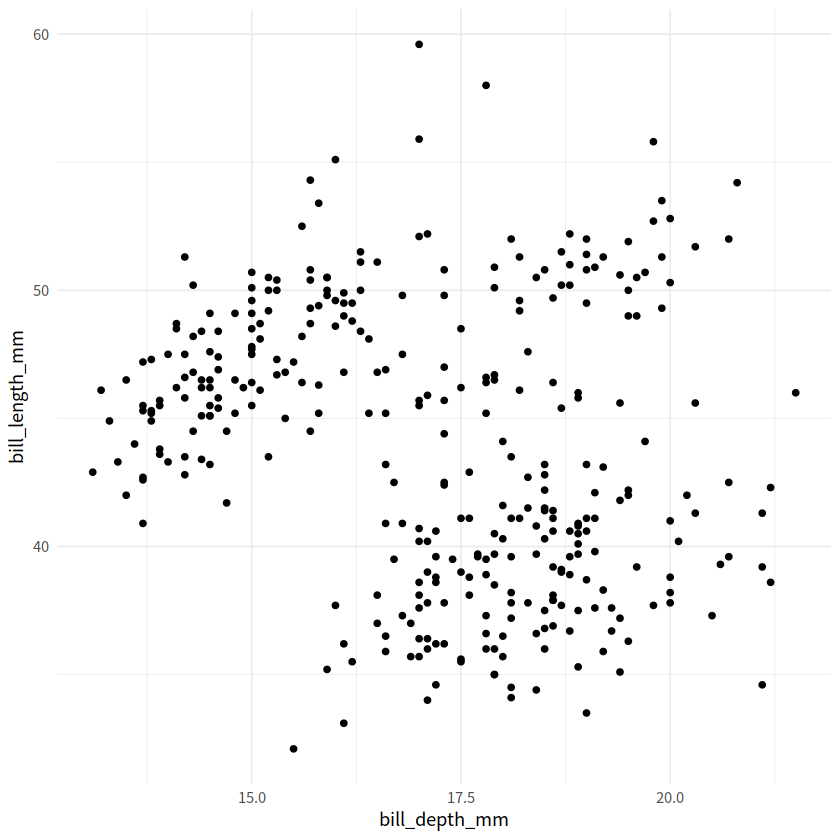

In [42]:
penguins %>% 
  ggplot(aes(x = bill_depth_mm, y = bill_length_mm))+
  geom_point()+
  theme_minimal()

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


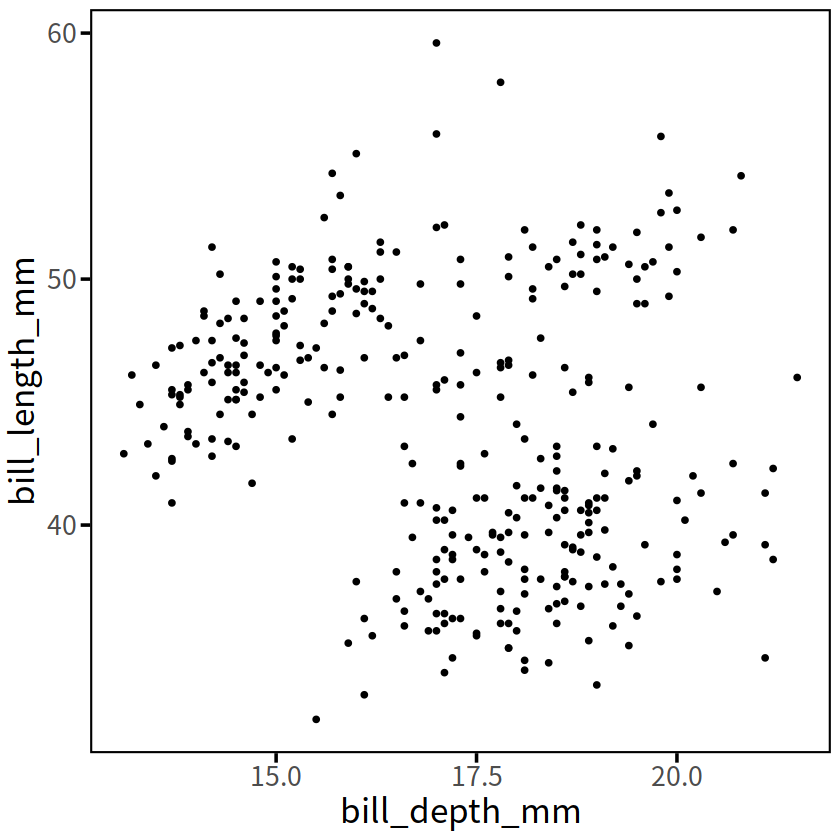

In [52]:
penguins %>% 
  ggplot(aes(x = bill_depth_mm, y = bill_length_mm))+
  geom_point()+
  theme_bw()+
  theme(text = element_text(family = "serif", size = 20),
        panel.grid = element_blank(),
        panel.border = element_rect(color = "black", size = 1.2),
        axis.ticks = element_line(size = 1, color = "black"),
        axis.ticks.length = unit(2, "mm"))

当然，`ggthemes`宏包也提供了很多优秀的主题风格

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


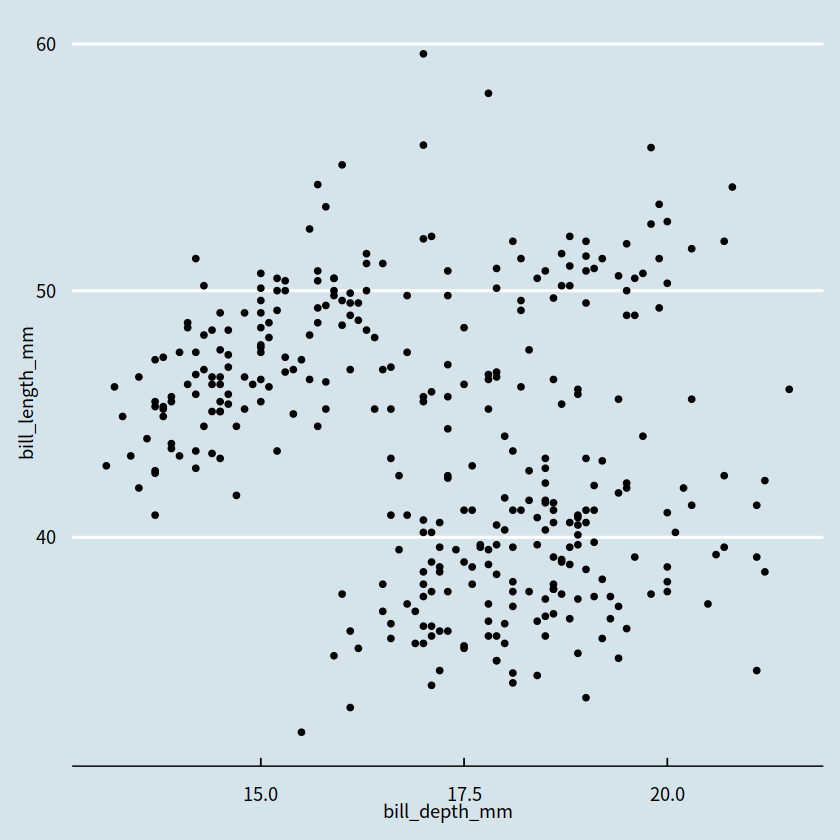

In [55]:
# install.packages("ggthemes")
library(ggthemes)
penguins %>% 
  ggplot(aes(x = bill_depth_mm, y = bill_length_mm))+
  geom_point()+
  ggthemes::theme_economist()

In [56]:
gapdata <- read_csv("./demo_data/gapminder.csv")

Rows: 1704 Columns: 6
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): country, continent
dbl (4): year, lifeExp, pop, gdpPercap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`geom_smooth()` using formula = 'y ~ x'


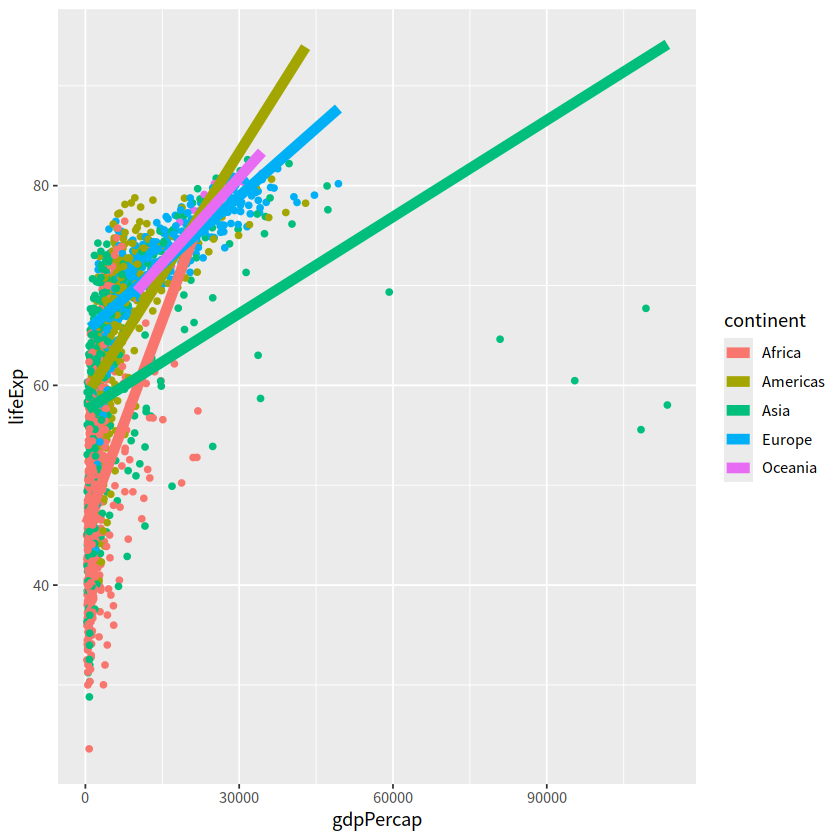

In [57]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent))+
  geom_point()+
  geom_smooth(lwd = 3, se = FALSE, method = "lm")+
  theme_grey() # 默认为这个

`geom_smooth()` using formula = 'y ~ x'


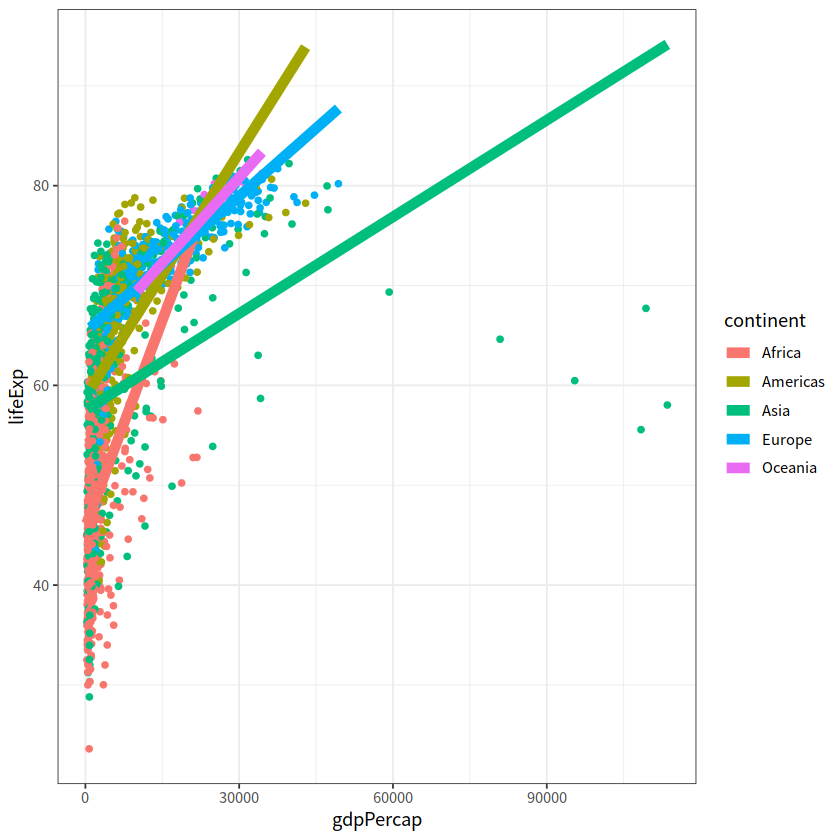

In [58]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  geom_smooth(lwd = 3, se = FALSE, method = "lm") +
  theme_bw()

`geom_smooth()` using formula = 'y ~ x'


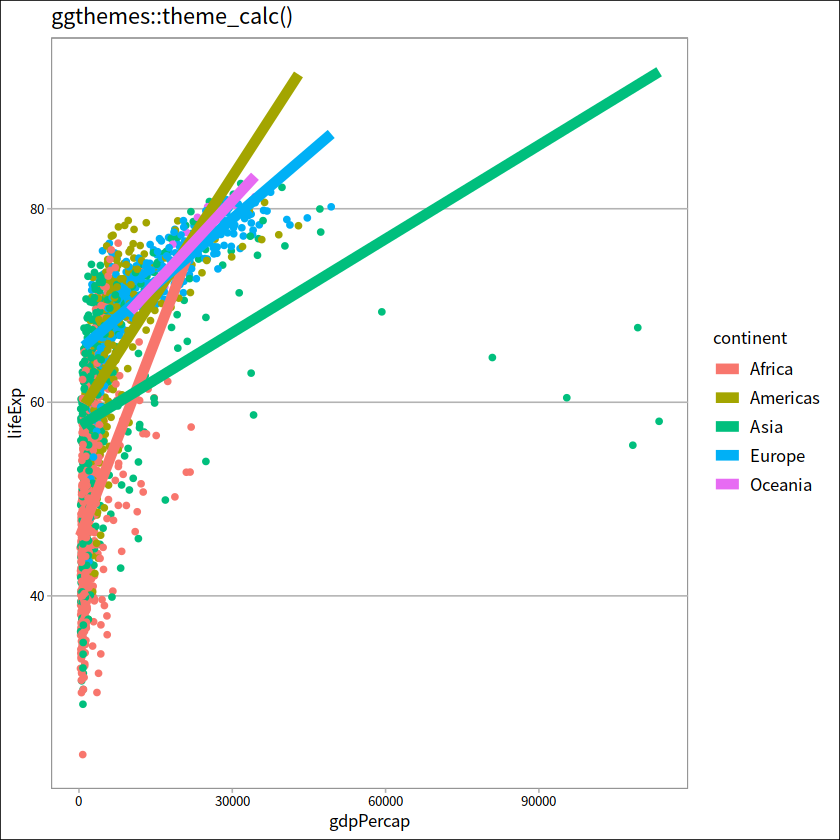

In [59]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  geom_smooth(lwd = 3, se = FALSE, method = "lm") +
  ggthemes::theme_calc()+
  ggtitle("ggthemes::theme_calc()")

`geom_smooth()` using formula = 'y ~ x'


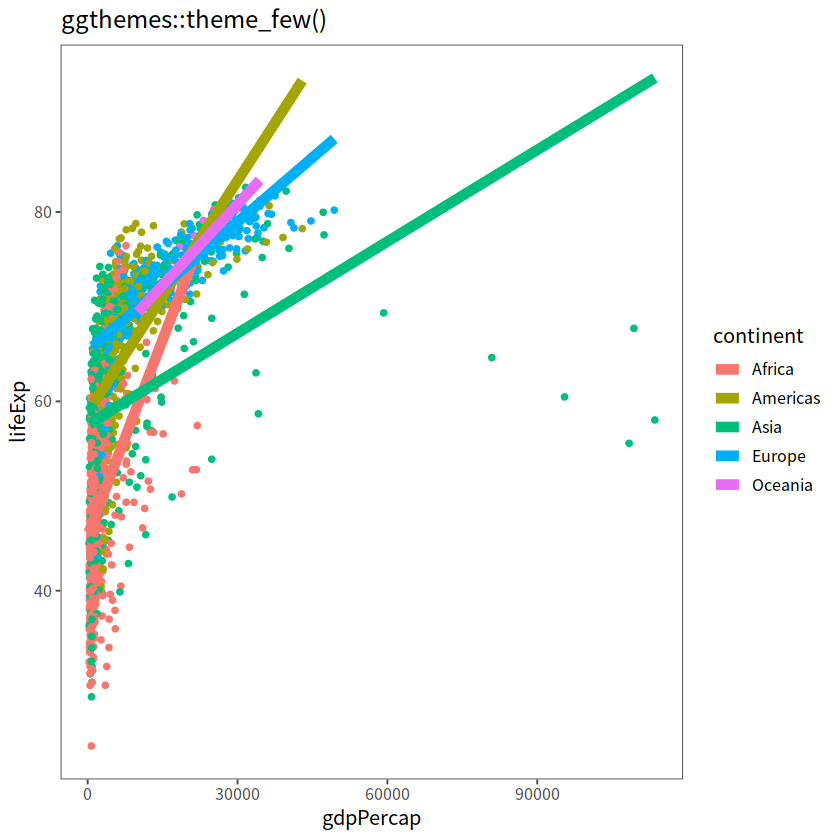

In [60]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  geom_smooth(lwd = 3, se = FALSE, method = "lm") +
  ggthemes::theme_few()+
  ggtitle("ggthemes::theme_few()")

`geom_smooth()` using formula = 'y ~ x'


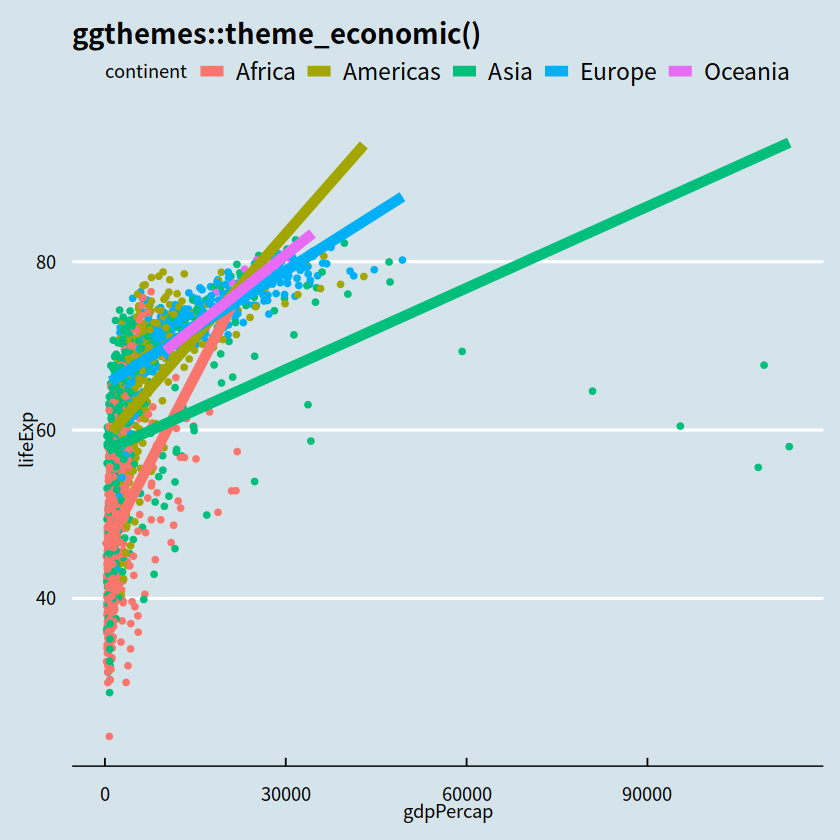

In [62]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  geom_smooth(lwd = 3, se = FALSE, method = "lm") +
  ggthemes::theme_economist()+
  ggtitle("ggthemes::theme_economic()")

`geom_smooth()` using formula = 'y ~ x'


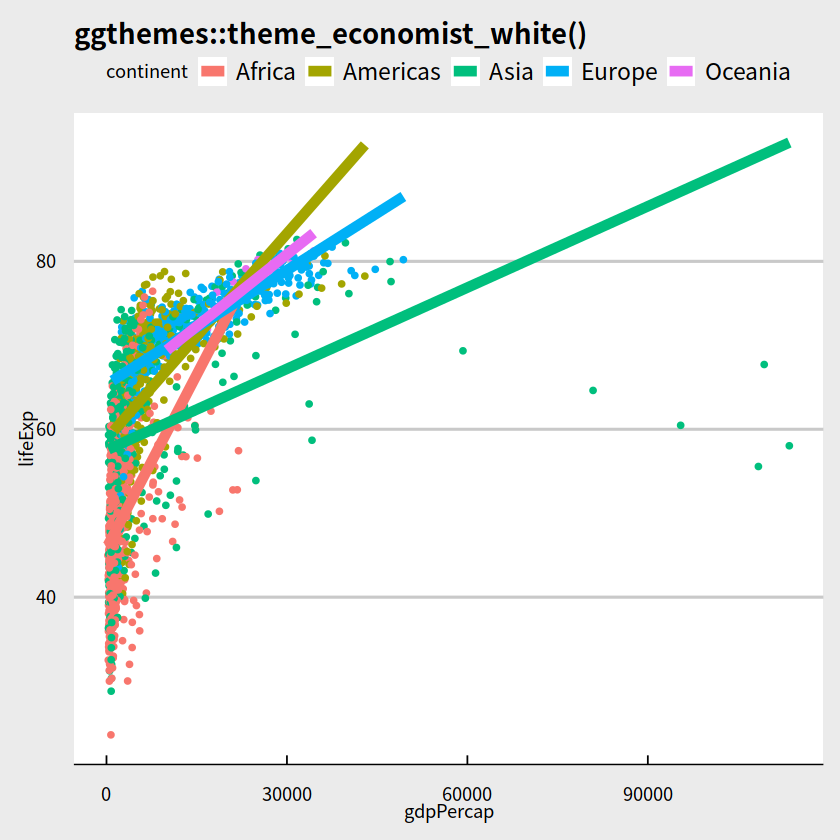

In [64]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  geom_smooth(lwd = 3, se = FALSE, method = "lm") +
  ggthemes::theme_economist_white()+
  ggtitle("ggthemes::theme_economist_white()")

`geom_smooth()` using formula = 'y ~ x'


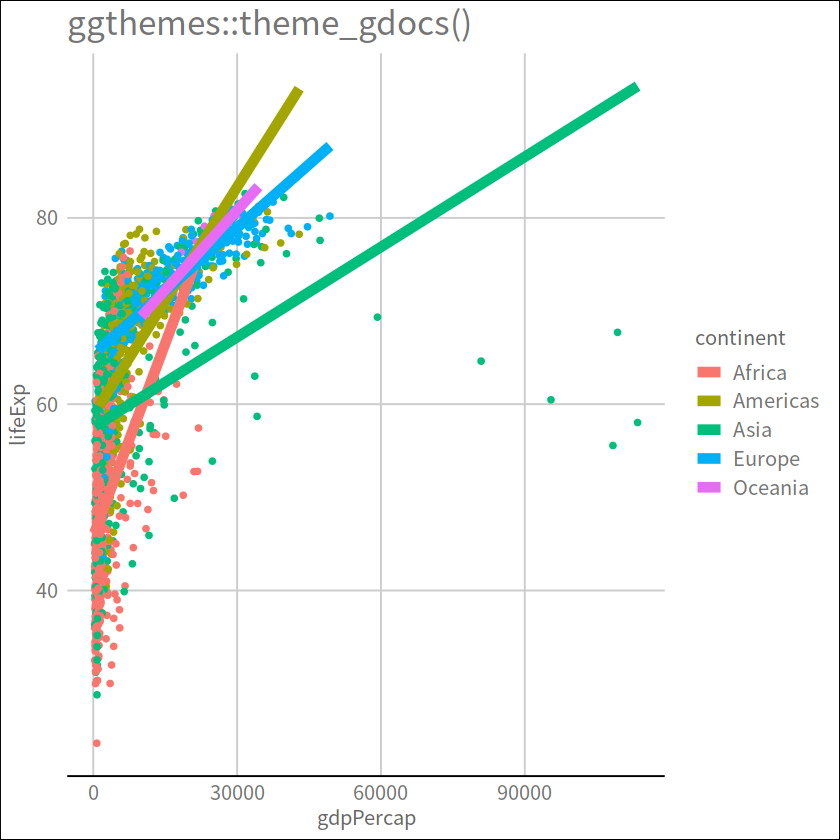

In [65]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  geom_smooth(lwd = 3, se = FALSE, method = "lm") +
  ggthemes::theme_gdocs()+
  ggtitle("ggthemes::theme_gdocs()")

`geom_smooth()` using formula = 'y ~ x'


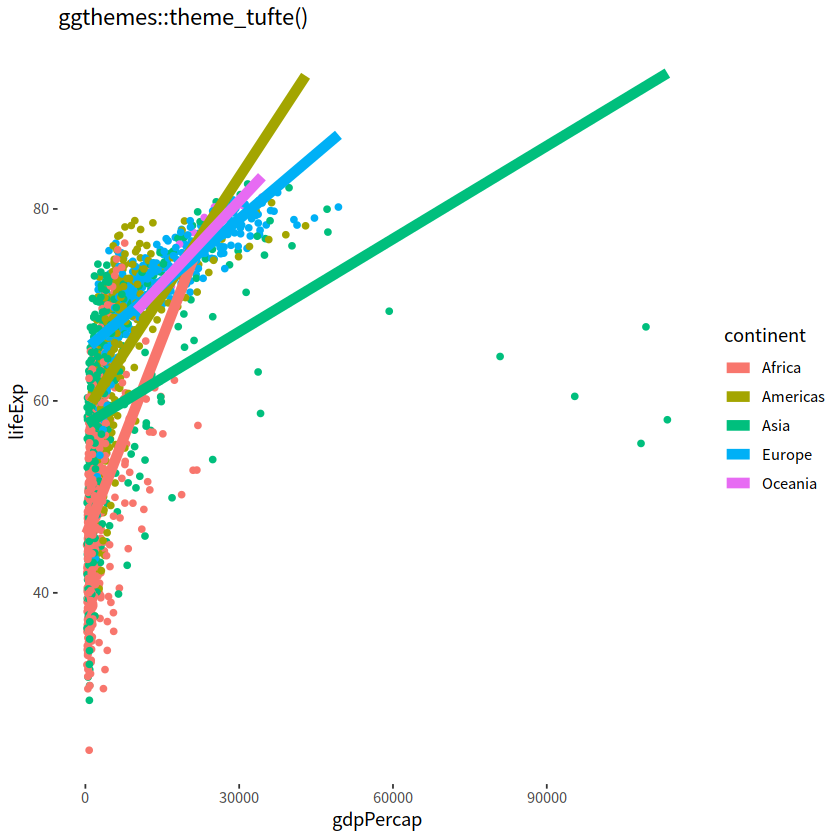

In [66]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  geom_smooth(lwd = 3, se = FALSE, method = "lm") +
  ggthemes::theme_tufte()+
  ggtitle("ggthemes::theme_tufte()")

`geom_smooth()` using formula = 'y ~ x'


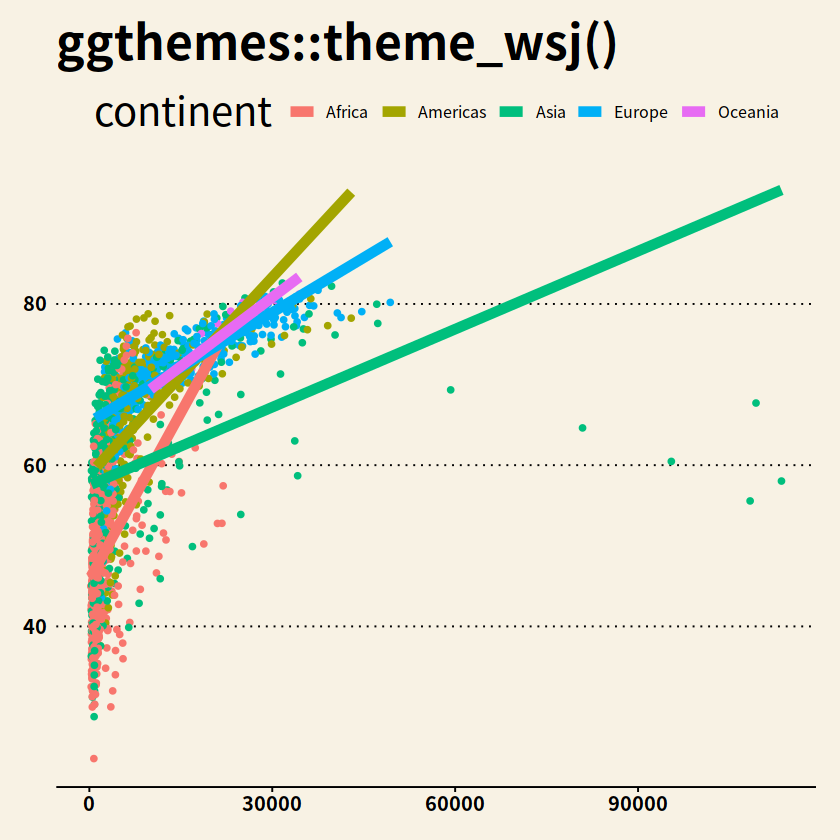

In [67]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  geom_smooth(lwd = 3, se = FALSE, method = "lm") +
  ggthemes::theme_wsj()+
  ggtitle("ggthemes::theme_wsj()")